In [2]:
import numpy as np
import scipy.ndimage as ndi
import cv2 as cv
import matplotlib.pyplot as plt

img = np.load("../matrices/segmentation/otsu.npy")
src = img[:,543,:] * 85

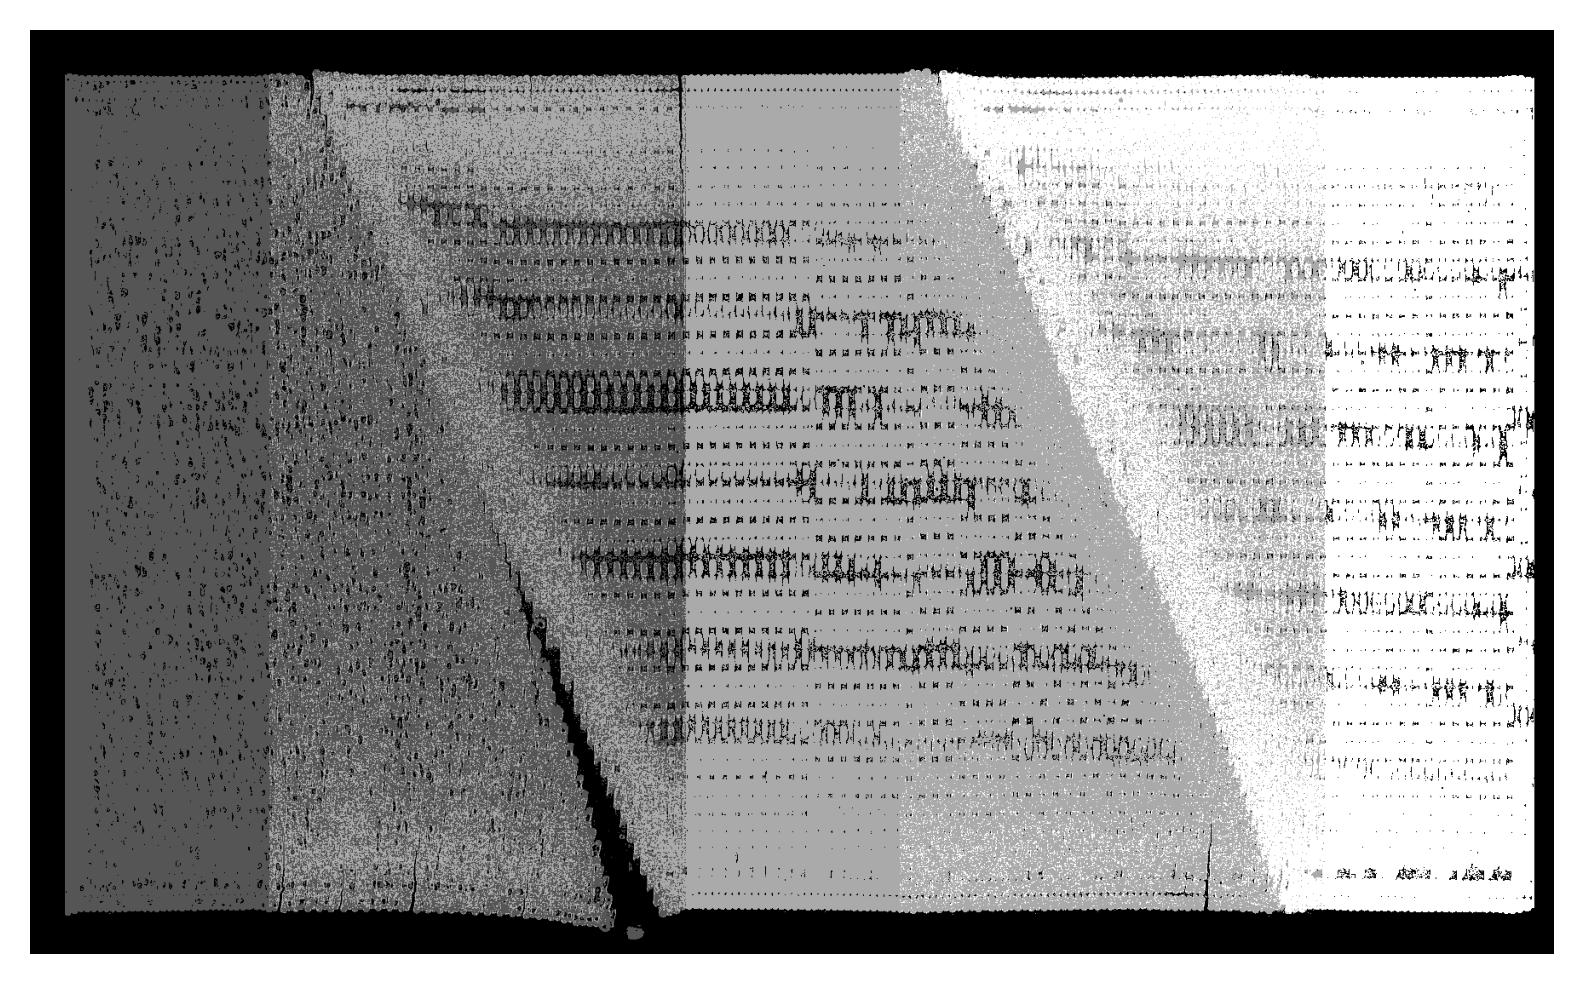

In [3]:
dst = cv.GaussianBlur(src, (11,11), 3)
dst = cv.Canny(dst, 50, 50)
fig, ax= plt.subplots()
fig.set_size_inches(7,4)
fig.set_dpi(300)
ax.imshow(dst, cmap='gray')
ax.axis(False)
plt.show()

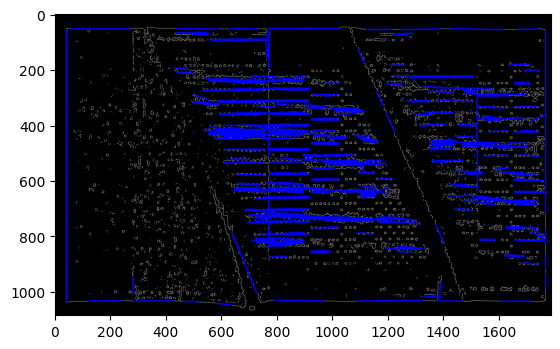

In [43]:
cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
 
if linesP is not None:
  for i in range(0, len(linesP)):
    l = linesP[i][0]
    cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

plt.imshow(cdstP)
plt.show()

C:\Users\TJ\AppData\Local\Temp\ipykernel_3232\1991188373.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan(rise/run)


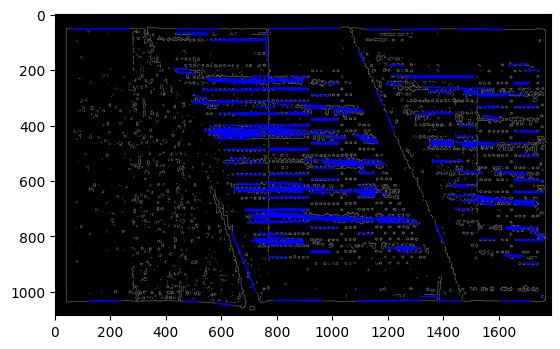

In [47]:
newline = []
for line in linesP:
    s = line[0]
    rise = s[2]-s[0]
    run = s[3]-s[1]
    angle = np.arctan(rise/run)
    if 1 < angle < 1.25:
        newline.append(s)

for i in range(len(newline)):
    l = newline[i]
    cv.line(cdst, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

plt.imshow(cdst)
plt.show()